In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Obtendo o dado

In [186]:
data = np.array([
    [1, 84, 46, 354],
    [2, 73, 20, 190],
    [3, 65, 52, 405],
    [4, 70, 30, 263],
    [5, 76, 57, 451],
    [6, 69, 25, 302],
    [7, 63, 28, 288],
    [8, 72, 36, 385],
    [9, 79, 57, 402],
    [10, 75, 44, 365],
    [11, 27, 24, 209],
    [12, 89, 31, 290],
    [13, 65, 52, 346],
    [14, 57, 23, 254],
    [15, 59, 60, 395],
    [16, 69, 48, 434],
    [17, 60, 34, 220],
    [18, 79, 51, 374],
    [19, 75, 50, 308],
    [20, 82, 34, 220],
    [21, 59, 46, 311],
    [22, 67, 23, 181],
    [23, 85, 37, 274],
    [24, 55, 40, 303],
    [25, 63, 30, 244]
])

In [187]:
df = pd.DataFrame(data)

In [188]:
df.head(5)

,0,1,2,3
0,1,84,46,354
1,2,73,20,190
2,3,65,52,405
3,4,70,30,263
4,5,76,57,451


In [189]:
df = df.rename(columns={1: 'Peso (Kg)', 2: 'Idade (anos)', 3: 'Taxa de Gordura no sangue'})
df.drop(columns=[0], inplace=True)

In [190]:
df.head(5)

,Peso (Kg),Idade (anos),Taxa de Gordura no sangue
0,84,46,354
1,73,20,190
2,65,52,405
3,70,30,263
4,76,57,451


### Entendendo o dado

In [191]:
df.describe()

,Peso (Kg),Idade (anos),Taxa de Gordura no sangue
count,25.000000,25.000000,25.00000
mean,68.680000,39.120000,310.72000
std,12.727005,12.248537,77.82915
min,27.000000,20.000000,181.00000
25%,63.000000,30.000000,254.00000
50%,69.000000,37.000000,303.00000
75%,76.000000,50.000000,374.00000
max,89.000000,60.000000,451.00000


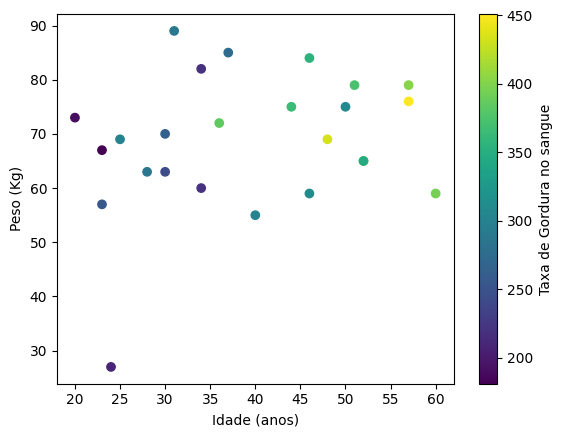

In [192]:
plt.scatter(df['Idade (anos)'], df['Peso (Kg)'], c=df['Taxa de Gordura no sangue'], cmap='viridis')
plt.xlabel('Idade (anos)')
plt.ylabel('Peso (Kg)')
plt.colorbar(label='Taxa de Gordura no sangue')
plt.show()

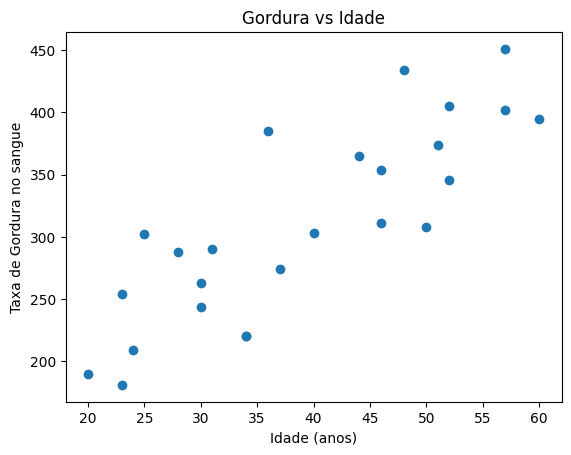

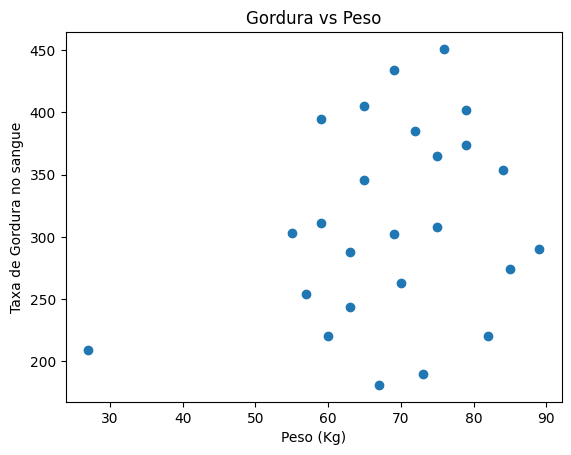

In [193]:
plt.scatter(df['Idade (anos)'], df['Taxa de Gordura no sangue'])
plt.xlabel('Idade (anos)')
plt.ylabel('Taxa de Gordura no sangue')
plt.title('Gordura vs Idade')
plt.show()

plt.scatter(df['Peso (Kg)'], df['Taxa de Gordura no sangue'])
plt.xlabel('Peso (Kg)')
plt.ylabel('Taxa de Gordura no sangue')
plt.title('Gordura vs Peso')
plt.show()


##### Como podemos analisar acima, a idade aparenta estar muito mais relacionado com a taxa de gordura do que o peso


### Ajustando o dado

In [252]:
# Para realizar o estudo, vou separar o dado em treino e teste, para poder validar os diferentes metodos utilizados
X = df.drop('Taxa de Gordura no sangue', axis=1)
y = df['Taxa de Gordura no sangue']

print("X set shape:", X.shape)
print("y set shape:", y.shape)


X set shape: (25, 2)
y set shape: (25,)


In [253]:
X = X.to_numpy()
y = y.to_numpy()

In [258]:
X = np.insert(X, 0, 1, axis=1)
X

array([[ 1, 84, 46],
       [ 1, 73, 20],
       [ 1, 65, 52],
       [ 1, 70, 30],
       [ 1, 76, 57],
       [ 1, 69, 25],
       [ 1, 63, 28],
       [ 1, 72, 36],
       [ 1, 79, 57],
       [ 1, 75, 44],
       [ 1, 27, 24],
       [ 1, 89, 31],
       [ 1, 65, 52],
       [ 1, 57, 23],
       [ 1, 59, 60],
       [ 1, 69, 48],
       [ 1, 60, 34],
       [ 1, 79, 51],
       [ 1, 75, 50],
       [ 1, 82, 34],
       [ 1, 59, 46],
       [ 1, 67, 23],
       [ 1, 85, 37],
       [ 1, 55, 40],
       [ 1, 63, 30]])

In [397]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    
def validate_y_pred(y_test,y_pred,y_pred_EN=None,y_pred_Mom=None,title=''):
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print("Mean squared error: %.2f" % mse)
    print('R2: %.2f' % r2)
    print('Mean Absolute Error: %.2f' % mae)


    plt.plot(range(len(y_test)), y_test, color='blue', label='Actual',)
    plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted')
    if y_pred_EN is not None: plt.plot(range(len(y_pred_EN)), y_pred, color='purple', label='Inverted', linestyle='dashed')
    if y_pred_Mom is not None: plt.plot(range(len(y_pred_Mom)), y_pred, color='green', label='With Momentum', linestyle='dashed')

    plt.ylabel('Idade (anos)')
    plt.xlabel('Row Number')
    plt.title(f'Actual vs Predicted {title}')
    plt.legend()
    plt.show()


def plot_weights(w,X,y):
    plt.scatter(X[:,2], y)
    area = np.linspace(X[:,2].min(), X[:,2].max(), 2)
    y_area = w[1]*area + w[0]

    plt.plot(area,y_area, color = 'crimson',linewidth = 3)
    plt.xlabel('Idade (anos)')
    plt.ylabel('Taxa de Gordura no sangue')
    plt.title('Reta dos Pesos')
    plt.show()
    
def get_y_pred(X,w):
    if X.shape[1] != len(w):
        X = np.insert(X, 0, 1, axis=1)
    y_pred = np.dot(X, w)
    return y_pred

### Obtendo os pesos

##### Invertendo a Matriz
Mesmo sendo uma pratica considerada ineficaz, 
vou obter os pesos primeiramente pelo metodo que inverte a matriz apenas para testar as funcoes de predicao
e assim comparar os resultados quando obter pelo gradiente descendente

In [398]:
def get_weights_EN(X_train, y_train):
    return np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [399]:
pesos_EN = get_weights_EN(X, y)
pesos_EN

array([77.98253861,  0.4173621 ,  5.21659081])

In [400]:
y_pred_EN = get_y_pred(X,pesos_EN)
y_pred_EN

array([353.00413212, 212.781788  , 376.37379709, 263.69560979,
       407.04773422, 237.19529365, 250.34089349, 295.82987884,
       408.29982052, 338.81469161, 214.44949469, 276.84208048,
       376.37379709, 221.75376685, 415.60235097, 357.17688225,
       280.38835204, 377.00027567, 370.11423646, 289.57031821,
       342.57007965, 225.92738784, 306.47217694, 309.6010864 ,
       260.7740751 ])

Mean squared error: 1712.25
R2: 0.71
Mean Absolute Error: 33.09


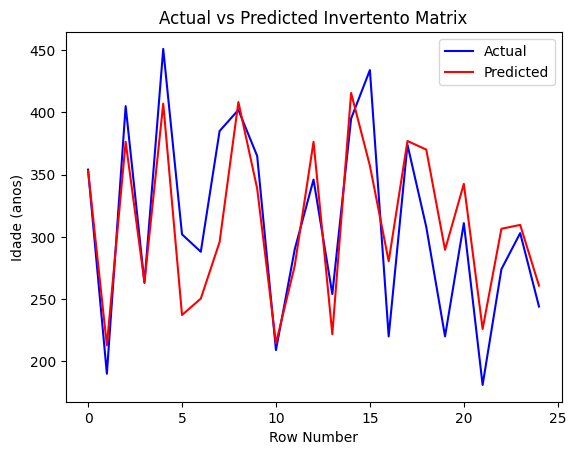

In [401]:
validate_y_pred(y,y_pred_EN, title='Invertento Matrix')

##### Usando Gradiente Descendente

Pelo que entendi a funcao para prever o valor da taxa de gordura seria $$ \hat{y} = w_0 + w_1 \cdot \text{Peso} + w_2 \cdot \text{Idade}$$

E para encontrar os pesos usamos o $$\text{EQM} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w_0 + w_1 \cdot Peso_{i} + w_2 \cdot Idade_{i}))^2$$

E a derivada parcial de cada um dos pesos mostra como a mudanca daquele peso afeta o erro

- Derivada do EQM em relação a `w0`:
  $$ \frac{\partial \text{EQM}}{\partial w_0} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w_0 + w_1 \cdot x_{i1} + w_2 \cdot x_{i2})) $$

- Derivada do EQM em relação a `w1`:
  $$ \frac{\partial \text{EQM}}{\partial w_1} = -\frac{2}{n} \sum_{i=1}^{n} x_{i1}(y_i - (w_0 + w_1 \cdot x_{i1} + w_2 \cdot x_{i2})) $$

- Derivada do EQM em relação a `w2`:
  $$ \frac{\partial \text{EQM}}{\partial w_2} = -\frac{2}{n} \sum_{i=1}^{n} x_{i2}(y_i - (w_0 + w_1 \cdot x_{i1} + w_2 \cdot x_{i2})) $$



In [402]:

def calcula_y_pred(X,w):
    #calcula o valor de y para um dado X e w
    return w[0] + w[1]*X[1] + w[2]*X[2]

def calcula_derivada_parcial_EQM(X,y,w,current_iter,wi):
    #calcula a derivada parcial da função de erro quadratico médio em relação ao peso w0
    #para um dado X, y e w
    print(f"i={current_iter} wi={wi}")
    wi = X[wi] if wi != 0 else 1
    somatoria = 0
    for x, yi in zip(X,y):
        somatoria +=  yi - calcula_y_pred(x,w)

    print(f"pesos={w}: erro={somatoria * (-2) / len(X)}")
    
    return somatoria * (-2) / len(X)

def calcula_pesos_com_gradiente_descendente(alpha,n_iter,me,X,y):
    #calcula os pesos da regressão linear com gradiente descendente
    w = np.zeros(3)
    for i in range(n_iter):
        olds = w.copy()
        w[0] -= alpha * calcula_derivada_parcial_EQM(X,y,w,i,0)
        w[1] -= alpha * calcula_derivada_parcial_EQM(X,y,w,i,1)
        w[2] -= alpha * calcula_derivada_parcial_EQM(X,y,w,i,2)
        diference = 0
        for i,j in zip(olds,w):
            diference += abs(i-j)
        if diference < me: return w  
        print(f"-------------------")
    return w

In [403]:
pesos = calcula_pesos_com_gradiente_descendente(0.0001,1000,1e-9,X,y)

i=0 wi=0
pesos=[0. 0. 0.]: erro=-621.44
i=0 wi=1
pesos=[0.062144 0.       0.      ]: erro=-621.3157120000005
i=0 wi=2
pesos=[0.062144   0.06213157 0.        ]: erro=-612.7813193799678
-------------------
i=1 wi=0
pesos=[0.062144   0.06213157 0.06127813]: erro=-607.9869183371391
i=1 wi=1
pesos=[0.12294269 0.06213157 0.06127813]: erro=-607.8653209534715
i=1 wi=2
pesos=[0.12294269 0.1229181  0.06127813]: erro=-599.5156829048549
-------------------
i=2 wi=0
pesos=[0.12294269 0.1229181  0.1212297 ]: erro=-594.8250722018073
i=2 wi=1
pesos=[0.1824252 0.1229181 0.1212297]: erro=-594.7061071873668
i=2 wi=2
pesos=[0.1824252  0.18238871 0.1212297 ]: erro=-586.5372240990414
-------------------
i=3 wi=0
pesos=[0.1824252  0.18238871 0.17988342]: erro=-581.9481568576903
i=3 wi=1
pesos=[0.24062001 0.18238871 0.17988342]: erro=-581.8317672263188
i=3 wi=2
pesos=[0.24062001 0.24057189 0.17988342]: erro=-573.839726071698
-------------------
i=4 wi=0
pesos=[0.24062001 0.24057189 0.2372674 ]: erro=-569.3500

In [404]:
y_pred = get_y_pred(X,pesos)

In [405]:
y_pred

array([374.16392142, 268.99699775, 336.61670773, 288.69313114,
       382.34042393, 271.66993454, 262.94150956, 311.41700862,
       390.95057981, 342.67219592, 148.29712327, 346.05474732,
       336.61670773, 231.56805316, 342.04142738, 336.77439986,
       271.31512724, 373.96680625, 359.65596948, 334.45627037,
       302.4126224 , 260.26857277, 351.55831304, 273.948641  ,
       268.60276741])

Mean squared error: 3047.19
R2: 0.48
Mean Absolute Error: 46.38


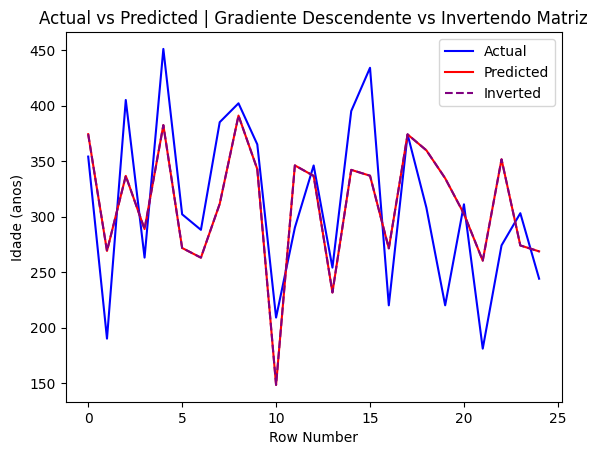

In [406]:
validate_y_pred(y,y_pred,y_pred_EN, title='| Gradiente Descendente vs Invertendo Matriz')

#### Utilizando Momentum


In [407]:
def calcula_pesos_com_gradiente_descendente_momentum(alpha,beta,n_iter,me,X,y):
    #calcula os pesos da regressão linear com gradiente descendente
    w = np.zeros(3)
    m = np.zeros(3)
    for iter in range(n_iter):
        olds = w.copy()
        for j in range(3):
            m[j] = beta * m[j] - alpha * calcula_derivada_parcial_EQM(X,y,w,iter,j)
            w[j] += m[j]
        diference = 0
        for i,j in zip(olds,w):
            diference += abs(i-j)
        if diference < me: return w
        print(f"-------------------")
    return w

In [408]:
pesos_momentum = calcula_pesos_com_gradiente_descendente_momentum(0.001, 0.9, 1000, 1e-9, X, y)

i=0 wi=0
pesos=[0. 0. 0.]: erro=-621.44
i=0 wi=1
pesos=[0.62144 0.      0.     ]: erro=-620.1971200000002
i=0 wi=2
pesos=[0.62144    0.62019712 0.        ]: erro=-535.0068435968001
-------------------
i=1 wi=0
pesos=[0.62144    0.62019712 0.53500684]: erro=-493.1479081537865
i=1 wi=1
pesos=[1.67388391 0.62019712 0.53500684]: erro=-491.04302033747865
i=1 wi=2
pesos=[1.67388391 1.66941755 0.53500684]: erro=-346.9221023010427
-------------------
i=2 wi=0
pesos=[1.67388391 1.66941755 1.36343511]: erro=-282.1058751182968
i=2 wi=1
pesos=[2.9031893  1.66941755 1.36343511]: erro=-279.64726433338336
i=2 wi=2
pesos=[2.9031893  2.8933632  1.36343511]: erro=-111.52608987175738
-------------------
i=3 wi=0
pesos=[2.9031893  2.8933632  2.22054663]: erro=-44.46568413571977
i=3 wi=1
pesos=[4.05402984 2.8933632  2.22054663]: erro=-42.164003061026236
i=3 wi=2
pesos=[4.05402984 4.03707829 2.22054663]: erro=114.9367014148998
-------------------
i=4 wi=0
pesos=[4.05402984 4.03707829 2.8770103 ]: erro=166.2

In [409]:
y_pred_momentum = get_y_pred(X,pesos_momentum)

Mean squared error: 3047.19
R2: 0.48
Mean Absolute Error: 46.38


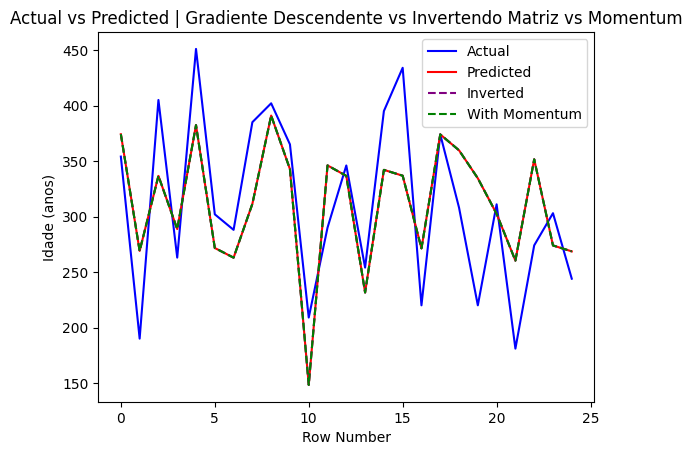

In [410]:
validate_y_pred(y,y_pred,y_pred_EN,y_pred_momentum, title='| Gradiente Descendente vs Invertendo Matriz vs Momentum')